# PCA Lab: Wednesday March 20th, 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scikitplot.metrics import plot_roc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

In [30]:
digits = load_digits()

X = digits.data

y = digits.target

In [5]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
# digits (image.. each row represents one image)
# columns represent pixels
# 8 x 8 pixels (low resolution)

In [7]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

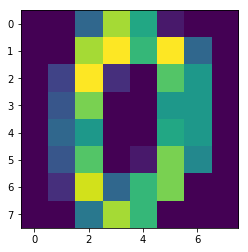

In [9]:
plt.imshow(X[0].reshape(8, 8))

In [10]:
y[0]

0

# AUC ROC

In [15]:
# ROC (Receiver Operating Characteristics)

# x axis, false positive rate (specificity, the rate of false positive)
# y axis, true positive rate (recall)

In [31]:
new_y = (y == 0).astype(int)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test
                         )
model = LogisticRegression(C=1000000, random_state=42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

#model.score(X_test, y_test)

print(classification_report(y_test,y_pred))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.93      0.82      0.87        50
           2       0.90      1.00      0.95        47
           3       0.91      0.91      0.91        54
           4       0.97      0.98      0.98        60
           5       0.95      0.91      0.93        66
           6       1.00      0.98      0.99        53
           7       0.98      0.96      0.97        55
           8       0.75      0.88      0.81        43
           9       0.95      0.92      0.93        59

   micro avg       0.94      0.94      0.94       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.94      0.94      0.94       540



In [33]:
model.predict_proba(X_test)

array([[2.02949535e-07, 1.16411184e-42, 2.01185745e-14, ...,
        1.34020255e-10, 3.29270708e-05, 3.72800638e-24],
       [2.37829826e-08, 5.57950904e-38, 3.08404127e-18, ...,
        8.05015620e-16, 1.49218490e-06, 5.05692493e-01],
       [7.69533433e-19, 3.16614051e-56, 3.44215579e-12, ...,
        1.28058182e-08, 2.37645620e-03, 2.16712482e-28],
       ...,
       [9.99999938e-01, 8.37913986e-80, 9.36697631e-13, ...,
        5.69295286e-08, 4.82696588e-09, 1.08659415e-33],
       [1.77077456e-16, 8.75754833e-38, 1.27974313e-01, ...,
        8.72024906e-01, 7.70693897e-07, 6.87542684e-29],
       [2.66671645e-08, 2.40603089e-35, 8.97820372e-14, ...,
        1.99042533e-16, 1.14729271e-01, 1.04031479e-41]])

In [34]:
# we care about the second column
model.predict_proba(X_test)[:, 1]

array([1.16411184e-042, 5.57950904e-038, 3.16614051e-056, 1.23034520e-022,
       1.15783647e-048, 6.78974987e-001, 5.70087493e-042, 4.92521967e-037,
       2.56150211e-048, 5.99991028e-079, 4.12897365e-003, 1.06178874e-022,
       1.24412608e-043, 1.91366753e-088, 8.46033207e-111, 2.21591871e-072,
       1.08288403e-047, 7.33166170e-062, 5.38358633e-046, 1.09151881e-041,
       3.51436736e-032, 1.34976962e-052, 4.99991553e-001, 3.49512460e-042,
       4.92741823e-001, 2.28347849e-086, 3.55713789e-052, 5.30170568e-025,
       1.26503186e-073, 2.42323452e-048, 1.85357296e-072, 2.11997093e-050,
       9.71525988e-001, 1.26773714e-063, 1.34694980e-052, 1.14658379e-035,
       1.96717489e-029, 9.57035221e-074, 2.92871603e-029, 2.36259698e-057,
       1.44091956e-046, 5.57210508e-020, 9.81566241e-001, 8.25253152e-086,
       9.19433450e-053, 9.97934275e-001, 3.41118001e-033, 7.09588444e-077,
       7.57000659e-094, 9.07574513e-051, 1.39084360e-040, 9.88517706e-001,
       7.23916327e-057, 6

In [28]:
y_proba = model.predict_proba(X_test)[:, 1]

In [29]:
roc_auc_score(y_test, y_proba)

ValueError: multiclass format is not supported

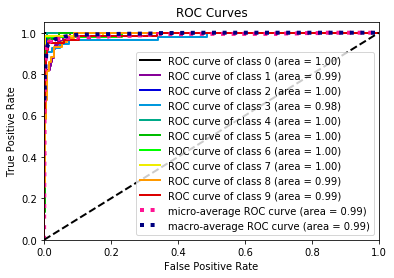

In [36]:
y_proba = model.predict_proba(X_test)
plot_roc(y_test, y_proba)

# Logistic Regression

In [37]:
from sklearn.metrics import classification_report

X = digits.data

y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

model = LogisticRegression(C=1000000, random_state=42)

model.fit(X_train,y_train)

model.score(X_test, y_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9962962962962963

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.91      0.86      0.89        50
           2       0.96      1.00      0.98        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.95      0.92      0.94        66
           6       1.00      0.98      0.99        53
           7       0.98      0.98      0.98        55
           8       0.76      0.95      0.85        43
           9       0.98      0.92      0.95        59

   micro avg       0.95      0.95      0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.96      0.95      0.95       540



# PCA MODEL

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pca = PCA()
X_train_pca = pca.fit_transform(X_train)

In [39]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
X_train_pca

array([[ 1.58822004e-01,  1.30088093e-01,  2.05083954e+00, ...,
         0.00000000e+00, -0.00000000e+00,  5.78737846e-15],
       [ 1.06496645e+00,  3.54094052e+00, -1.11566692e+00, ...,
        -2.24724751e-16, -3.51259885e-17,  1.75793175e-17],
       [-1.60053217e+00, -4.15197884e+00, -4.84268069e+00, ...,
         3.82702088e-16,  1.26540173e-16,  1.38194508e-17],
       ...,
       [-1.63729675e+00,  2.26052812e+00, -5.42754470e-01, ...,
         9.39335556e-17, -1.40526093e-16, -3.60904632e-17],
       [ 1.68589846e+00,  1.80446546e+00, -2.81502652e-01, ...,
         9.83275675e-17,  5.74839386e-17,  2.14944696e-17],
       [ 3.26841912e-01, -4.43085128e-01, -4.46997411e+00, ...,
         2.67341766e-17,  1.07991301e-17,  1.99152898e-17]])

In [41]:
X_train_pca.shape

(1257, 64)

In [42]:
pca.explained_variance_

array([7.41115389e+00, 5.92741603e+00, 5.24413768e+00, 3.93664706e+00,
       2.99498730e+00, 2.63682468e+00, 2.39485592e+00, 2.05037103e+00,
       1.87131977e+00, 1.78712640e+00, 1.69194400e+00, 1.55785114e+00,
       1.38214354e+00, 1.37280164e+00, 1.29009241e+00, 1.16421494e+00,
       1.07164484e+00, 9.95161188e-01, 9.67393119e-01, 9.30761956e-01,
       8.10905588e-01, 7.75308636e-01, 6.71426637e-01, 6.28139222e-01,
       6.05388003e-01, 5.70502549e-01, 5.26597639e-01, 5.06511117e-01,
       4.80691024e-01, 4.61191485e-01, 4.29964253e-01, 4.16234883e-01,
       3.90040028e-01, 3.64107286e-01, 3.40664876e-01, 3.28252019e-01,
       3.03860451e-01, 2.81907556e-01, 2.75548736e-01, 2.67582554e-01,
       2.48169510e-01, 2.40810109e-01, 2.16650273e-01, 2.02803758e-01,
       1.95951584e-01, 1.87193269e-01, 1.75089793e-01, 1.67750059e-01,
       1.55445421e-01, 1.37920233e-01, 1.34479809e-01, 1.15311702e-01,
       1.12100460e-01, 1.09080331e-01, 9.88881727e-02, 8.82649243e-02,
      

In [43]:
pca.explained_variance_ratio_ # all of these add up to 1

array([1.21397672e-01, 9.70934509e-02, 8.59010776e-02, 6.44838570e-02,
       4.90590926e-02, 4.31922454e-02, 3.92287001e-02, 3.35858994e-02,
       3.06529680e-02, 2.92738469e-02, 2.77147210e-02, 2.55182262e-02,
       2.26400654e-02, 2.24870412e-02, 2.11322309e-02, 1.90703074e-02,
       1.75539721e-02, 1.63011392e-02, 1.58462871e-02, 1.52462540e-02,
       1.32829586e-02, 1.26998663e-02, 1.09982375e-02, 1.02891723e-02,
       9.91649819e-03, 9.34506046e-03, 8.62588044e-03, 8.29685516e-03,
       7.87391169e-03, 7.55450142e-03, 7.04298684e-03, 6.81809425e-03,
       6.38901203e-03, 5.96422332e-03, 5.58022725e-03, 5.37689967e-03,
       4.97735601e-03, 4.61775879e-03, 4.51359877e-03, 4.38310951e-03,
       4.06511607e-03, 3.94456613e-03, 3.54881833e-03, 3.32200686e-03,
       3.20976550e-03, 3.06630079e-03, 2.86804100e-03, 2.74781322e-03,
       2.54625832e-03, 2.25918871e-03, 2.20283318e-03, 1.88885191e-03,
       1.83625048e-03, 1.78677955e-03, 1.61982791e-03, 1.44581485e-03,
      

In [44]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [45]:
pca.explained_variance_ratio_.cumsum()

array([0.12139767, 0.21849112, 0.3043922 , 0.36887606, 0.41793515,
       0.4611274 , 0.5003561 , 0.53394199, 0.56459496, 0.59386881,
       0.62158353, 0.64710176, 0.66974182, 0.69222886, 0.71336109,
       0.7324314 , 0.74998537, 0.76628651, 0.7821328 , 0.79737905,
       0.81066201, 0.82336188, 0.83436012, 0.84464929, 0.85456579,
       0.86391085, 0.87253673, 0.88083358, 0.8887075 , 0.896262  ,
       0.90330498, 0.91012308, 0.91651209, 0.92247631, 0.92805654,
       0.93343344, 0.9384108 , 0.94302855, 0.94754215, 0.95192526,
       0.95599038, 0.95993495, 0.96348376, 0.96680577, 0.97001554,
       0.97308184, 0.97594988, 0.97869769, 0.98124395, 0.98350314,
       0.98570597, 0.98759482, 0.98943107, 0.99121785, 0.99283768,
       0.9942835 , 0.99568709, 0.99695515, 0.99819058, 0.99923744,
       1.        , 1.        , 1.        , 1.        ])

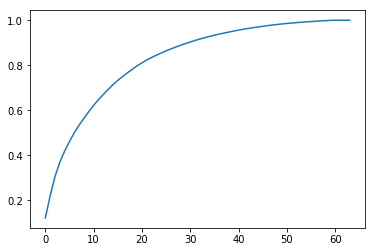

In [46]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot() # we can say 30% of our components explains 90% of our variance

## Lets say we want 90% from the start

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pca = PCA(n_components=.9) # choose number of components, or probability you want (in this case .90). or you can set it to 31 components
X_train_pca = pca.fit_transform(X_train)

In [48]:
X_train_pca.shape

(1257, 31)

## Now let's train a model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pca = PCA(n_components=25) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


model = LogisticRegression(C=1000000, random_state=42)
model.fit(X_train,y_train)
model.score(X_test, y_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9949494949494949

## USES

In [57]:
# Now you can use this for your final model
# less noise
# less features... so now it is faster
# takes up less memory now because you have less features

## Visualize / Cluster

In [58]:
# this time going to do entire dataset
scaler = StandardScaler()
X_pca = scaler.fit_transform(X)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_pca)

In [59]:
X_pca

array([[ 1.91420427, -0.95453114],
       [ 0.58897394,  0.9246487 ],
       [ 1.30206428, -0.31721662],
       ...,
       [ 1.02257742, -0.14796493],
       [ 1.0760316 , -0.38091218],
       [-1.25773168, -2.22764611]])

In [60]:
pd.DataFrame(X_pca)

,0,1
0,1.914204,-0.954531
1,0.588974,0.924649
2,1.302064,-0.317217
3,-3.020763,-0.868746
4,4.528967,-1.093499
5,-1.301941,-1.148138
6,1.434222,-2.957852
7,0.614231,5.462118
8,-1.098468,-0.665934
9,-0.538004,-0.777467


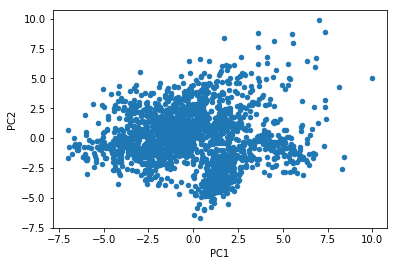

In [62]:
pd.DataFrame(X_pca, columns=['PC1', 'PC2']).plot(kind='scatter', x='PC1', y='PC2')
# you can use this to see if there are clusters

### fit a k-means model

In [63]:
model = KMeans()

clusters = model.fit_predict(X_pca)

In [64]:
clusters

array([3, 3, 3, ..., 3, 3, 7])

In [65]:
clusters.shape

(1797,)

In [ ]:
# now each image has been assigned to each cluster

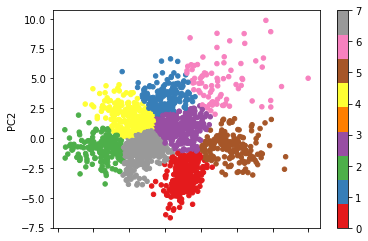

In [66]:
pd.DataFrame(X_pca, columns=['PC1', 'PC2']).plot(kind='scatter', x='PC1', y='PC2', c=clusters, colormap='Set1');

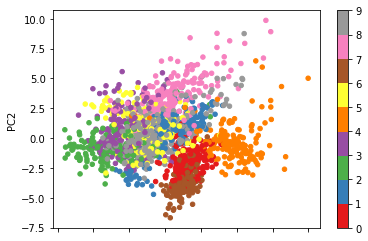

In [67]:
# compare it to the actual labels

pd.DataFrame(X_pca, columns=['PC1', 'PC2']).plot(kind='scatter', x='PC1', y='PC2', c=y, colormap='Set1');

In [68]:
# by reducing the number of components you can see if your clusters make sense